In [1]:
#INSY 5378-002 Data Science: A Programming Approach
#Instructor: Dr. Sridhar Panchapakesan Nerur

# Group Members: Charan Tej Reddy, Kopppala(1002127325)
#               Venkata Laxmana Srikanth, Bharam (1002109139)

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow


# <center>Sports Image Classification </center>

# Importing libraries

In [4]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Loading the data

In [5]:
# Load dataset
train_df = pd.read_csv('dataset/train.csv')


In [6]:
train_df.head()

,image_ID,label
0,7c225f7b61.jpg,Badminton
1,b31.jpg,Badminton
2,acb146546c.jpg,Badminton
3,0e62f4d8f2.jpg,Badminton
4,cfd2c28c74.jpg,Cricket


# Label wise count

In [7]:
# Group the DataFrame by the 'label' column and count the number of unique 'image_ID' values for each group
label_counts = train_df.groupby('label')['image_ID'].nunique()

# You can convert the result to a DataFrame if you want
label_counts_df = pd.DataFrame({'label': label_counts.index, 'image_count': label_counts.values})

# Display the label-wise image counts
print(label_counts_df)

       label  image_count
0  Badminton         1394
1    Cricket         1556
2     Karate          578
3     Soccer         1188
4   Swimming          595
5     Tennis         1445
6  Wrestling         1471


# Data visuals

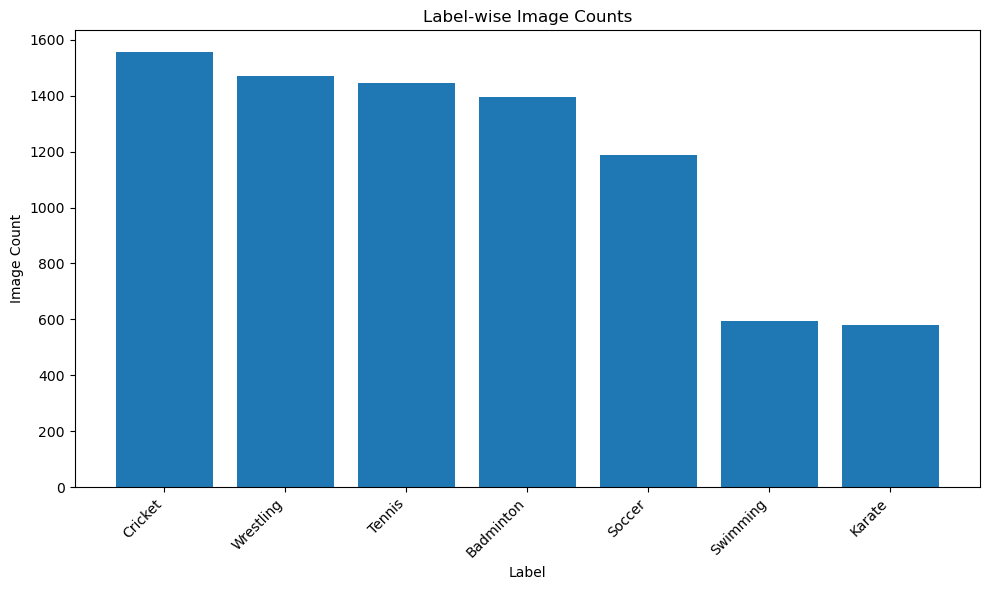

In [8]:
# Sort the DataFrame by 'image_count' in descending order for better visualization
label_counts_df = label_counts_df.sort_values(by='image_count', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(label_counts_df['label'], label_counts_df['image_count'])
plt.xlabel('Label')
plt.ylabel('Image Count')
plt.title('Label-wise Image Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# slplitting the data

In [9]:

# Split dataset into training and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2)  


# CNN model

In [10]:

# ImageDataGenerator for augmenting images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


In [11]:


# Train generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='dataset/train/',
    x_col='image_ID',
    y_col='label',
    class_mode='categorical',
    target_size=(64, 64)
)

# Validation generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='dataset/train/',
    x_col='image_ID',
    y_col='label',
    class_mode='categorical',
    target_size=(64, 64)
)

Found 6581 validated image filenames belonging to 7 classes.
Found 1646 validated image filenames belonging to 7 classes.


In [12]:

# Number of classes
num_classes = len(train_generator.class_indices)
print(num_classes)

7


In [13]:


# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])


In [14]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 64)                1968192   
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 1969543 (7.51 MB)
Trainable params: 1969543 (7.51 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [16]:

# Train model
history = model.fit(train_generator, epochs=2, validation_data=val_generator)


Epoch 1/2
206/206 [==============================] - 121s 582ms/step - loss: 1.4773 - accuracy: 0.4592 - val_loss: 1.1493 - val_accuracy: 0.5851
Epoch 2/2
206/206 [==============================] - 115s 561ms/step - loss: 0.8942 - accuracy: 0.6997 - val_loss: 0.9236 - val_accuracy: 0.6853


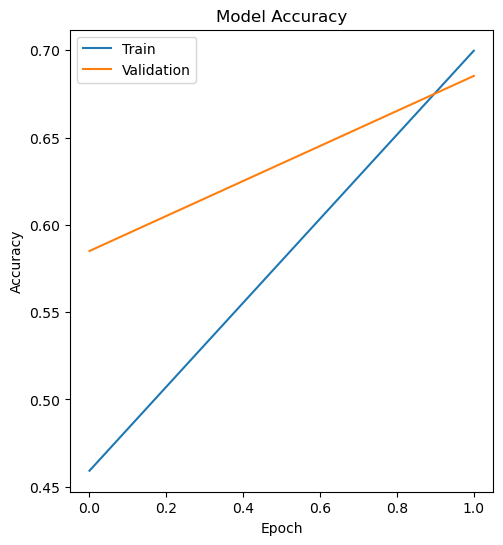

In [17]:
# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


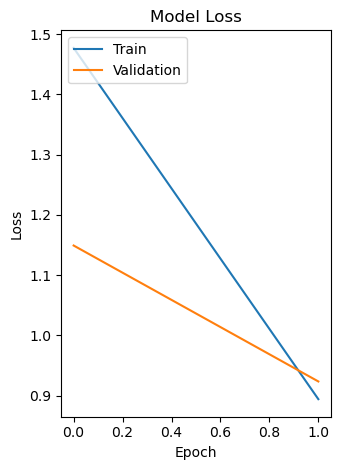

In [18]:

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [19]:

# Predict classes on validation set
val_predictions = model.predict(val_generator)
val_predicted_classes = np.argmax(val_predictions, axis=1)


52/52 [==============================] - 20s 375ms/step


In [20]:

# Get true class labels from validation set
true_classes = val_generator.classes

# Optional: Save the model
model.save('cnn_model_1.h5')


C:\Users\venka\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Extracting final validation accuracy
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"CNN Accuracy: {final_val_accuracy * 100:.2f}%")

# Predict classes on validation set
val_predictions = model.predict(val_generator)
val_predicted_classes = np.argmax(val_predictions, axis=1)

# Get true class labels from validation set
true_classes = val_generator.classes

# Classification report
print("Classification Report:\n")
print(classification_report(true_classes, val_predicted_classes, target_names=list(train_generator.class_indices.keys())))



CNN Accuracy: 68.53%
52/52 [==============================] - 20s 387ms/step
Classification Report:

              precision    recall  f1-score   support

   Badminton       0.22      0.22      0.22       289
     Cricket       0.19      0.14      0.16       306
      Karate       0.05      0.02      0.03       104
      Soccer       0.16      0.17      0.16       267
    Swimming       0.03      0.04      0.03       110
      Tennis       0.16      0.17      0.17       275
   Wrestling       0.16      0.20      0.18       295

    accuracy                           0.16      1646
   macro avg       0.14      0.14      0.14      1646
weighted avg       0.16      0.16      0.16      1646



In [22]:
# Confusion Matrix
print("Confusion Matrix:\n")
conf_matrix = confusion_matrix(true_classes, val_predicted_classes)
print(conf_matrix)

Confusion Matrix:

[[63 34  4 48 14 45 81]
 [45 43  9 58 26 53 72]
 [13 12  2 23  6 23 25]
 [31 44 11 45 22 53 61]
 [22 17  3 21  4 19 24]
 [52 31 11 46 24 48 63]
 [57 50  4 42 28 54 60]]


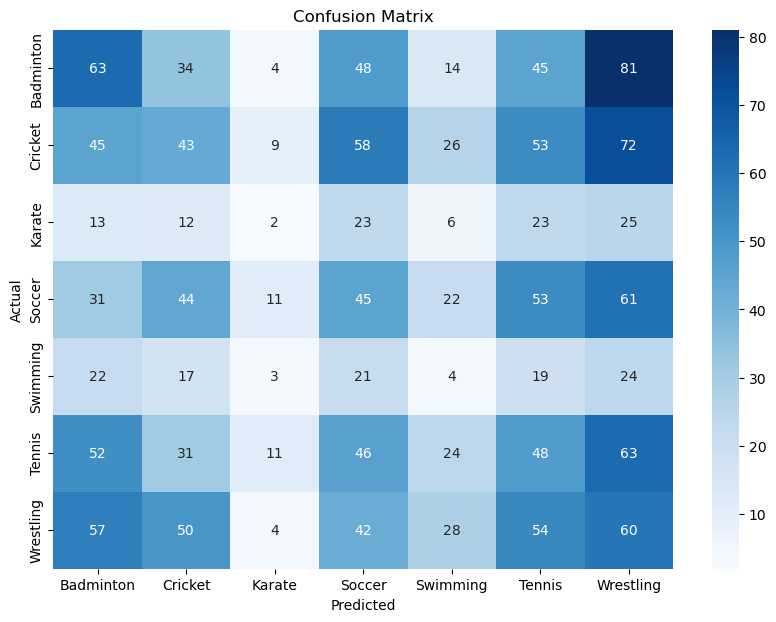

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Labels for your classes
class_labels = list(train_generator.class_indices.keys())  # Replace with your class labels

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [24]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to predict the class of an image
def predict_image_class(model, img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(64, 64))  # Resize to match model's expected input

    # Convert the image to a numpy array and normalize
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    # Return the predicted class
    return predicted_class




1/1 [==============================] - 0s 140ms/step


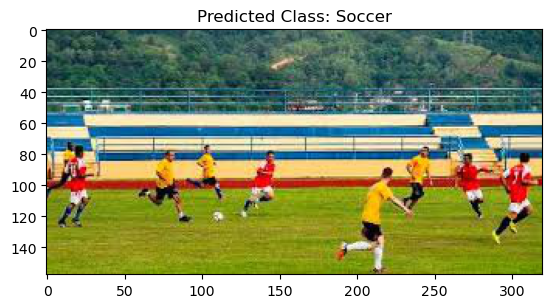

In [25]:
# Replace 'path_to_image' with the path of the image you want to predict
path_to_image =  r'dataset/test\58b8d567a2.jpg'   # User input image path
predicted_class = predict_image_class(model, path_to_image)

# Display the image and prediction
img = Image.open(path_to_image)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

1/1 [==============================] - 0s 48ms/step


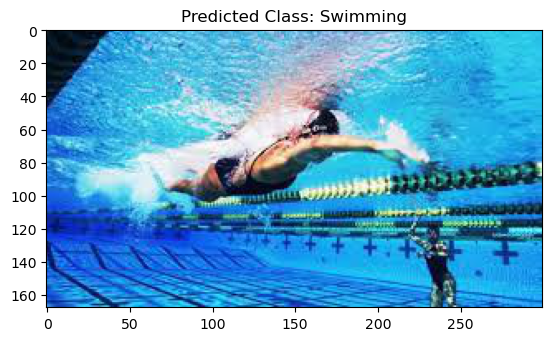

In [26]:
# Replace 'path_to_image' with the path of the image you want to predict
path_to_image =   r'dataset/test\f99dcdcdac.jpg'   # User input image path
predicted_class = predict_image_class(model, path_to_image)

# Display the image and prediction
img = Image.open(path_to_image)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

# VGG16

In [27]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from PIL import Image




In [28]:

# ImageDataGenerator for augmenting images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='dataset/train/',
    x_col='image_ID',
    y_col='label',
    class_mode='categorical',
    target_size=(64, 64)
)

# Validation generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='dataset/train/',
    x_col='image_ID',
    y_col='label',
    class_mode='categorical',
    target_size=(64, 64)
)

# Number of classes
num_classes = len(train_generator.class_indices)

# Load VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top for our specific task
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, epochs=2, validation_data=val_generator)

Found 6581 validated image filenames belonging to 7 classes.
Found 1646 validated image filenames belonging to 7 classes.
Epoch 1/2
206/206 [==============================] - 555s 3s/step - loss: 1.2041 - accuracy: 0.5682 - val_loss: 0.9749 - val_accuracy: 0.6652
Epoch 2/2
206/206 [==============================] - 552s 3s/step - loss: 0.8142 - accuracy: 0.7183 - val_loss: 0.9168 - val_accuracy: 0.6768


In [29]:
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"VGG16 Accuracy: {final_val_accuracy * 100:.2f}%")


VGG16 Accuracy: 67.68%


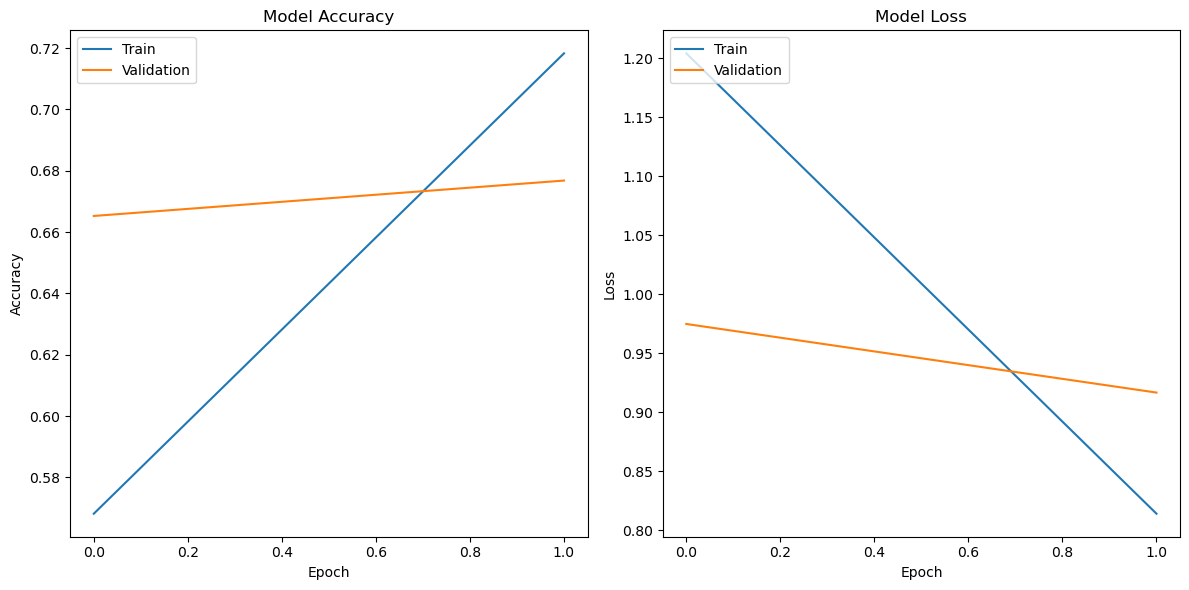

In [30]:
# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [31]:
# Summary of the model 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [32]:

# Predict classes on validation set and generate a classification report
val_predictions = model.predict(val_generator)
val_predicted_classes = np.argmax(val_predictions, axis=1)
true_classes = val_generator.classes

print("Classification Report:\n")
print(classification_report(true_classes, val_predicted_classes, target_names=list(train_generator.class_indices.keys())))


52/52 [==============================] - 116s 2s/step
Classification Report:

              precision    recall  f1-score   support

   Badminton       0.19      0.29      0.23       289
     Cricket       0.19      0.16      0.17       306
      Karate       0.08      0.08      0.08       104
      Soccer       0.12      0.09      0.10       267
    Swimming       0.03      0.03      0.03       110
      Tennis       0.18      0.11      0.14       275
   Wrestling       0.19      0.25      0.21       295

    accuracy                           0.17      1646
   macro avg       0.14      0.14      0.14      1646
weighted avg       0.16      0.17      0.16      1646



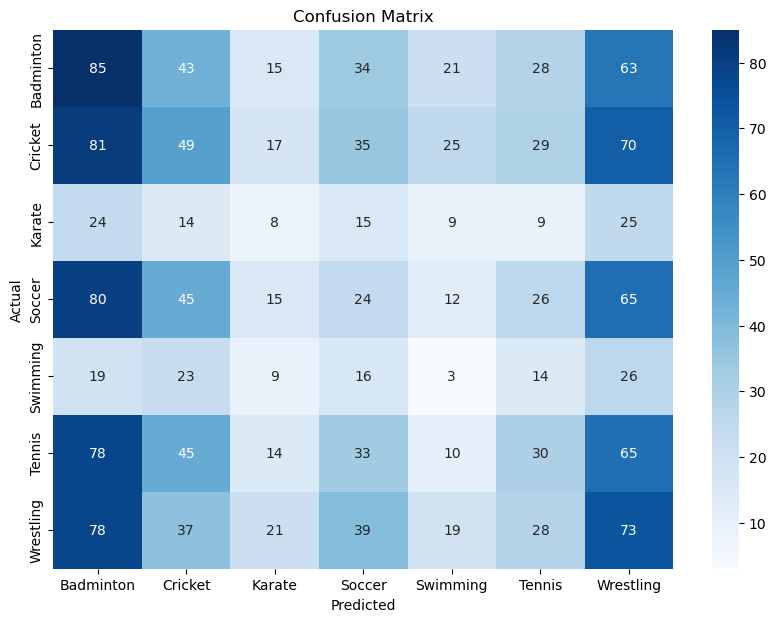

C:\Users\venka\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, val_predicted_classes)
class_labels = list(train_generator.class_indices.keys())  # Replace with your class labels

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Optional: Save the model
model.save('vgg16_model.h5')


In [34]:

# Function to predict the class of an image
def predict_image_class(model, img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(64, 64))

    # Convert the image to a numpy array and normalize
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

    # Return the predicted class
    return predicted_class


1/1 [==============================] - 0s 317ms/step


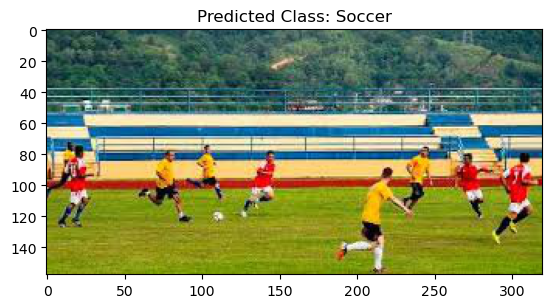

In [35]:
# Replace 'path_to_image' with the path of the image you want to predict
path_to_image =  r'dataset/test\58b8d567a2.jpg'   # User input image path
predicted_class = predict_image_class(model, path_to_image)

# Display the image and prediction
img = Image.open(path_to_image)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

1/1 [==============================] - 0s 98ms/step


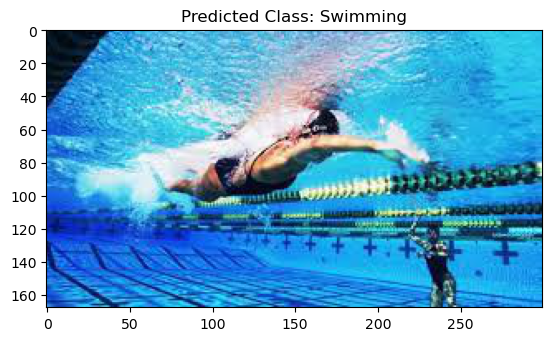

In [36]:
# Replace 'path_to_image' with the path of the image you want to predict
path_to_image =   r'dataset/test\f99dcdcdac.jpg'   # User input image path
predicted_class = predict_image_class(model, path_to_image)

# Display the image and prediction
img = Image.open(path_to_image)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

# ResNet

In [37]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.applications.resnet50 import ResNet50
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from PIL import Image


In [38]:
# ImageDataGenerator for augmenting images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='dataset/train/',
    x_col='image_ID',
    y_col='label',
    class_mode='categorical',
    target_size=(64, 64)
)

# Validation generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='dataset/train/',
    x_col='image_ID',
    y_col='label',
    class_mode='categorical',
    target_size=(64, 64)
)

# Number of classes
num_classes = len(train_generator.class_indices)

# Load ResNet50 model pre-trained on ImageNet data
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top for our specific task
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, epochs=2, validation_data=val_generator)

Found 6581 validated image filenames belonging to 7 classes.
Found 1646 validated image filenames belonging to 7 classes.
Epoch 1/2
206/206 [==============================] - 265s 1s/step - loss: 1.7654 - accuracy: 0.3034 - val_loss: 1.6620 - val_accuracy: 0.3566
Epoch 2/2
206/206 [==============================] - 258s 1s/step - loss: 1.6365 - accuracy: 0.3718 - val_loss: 1.5849 - val_accuracy: 0.4089


In [39]:
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"ResNet Accuracy: {final_val_accuracy * 100:.2f}%")


ResNet Accuracy: 40.89%


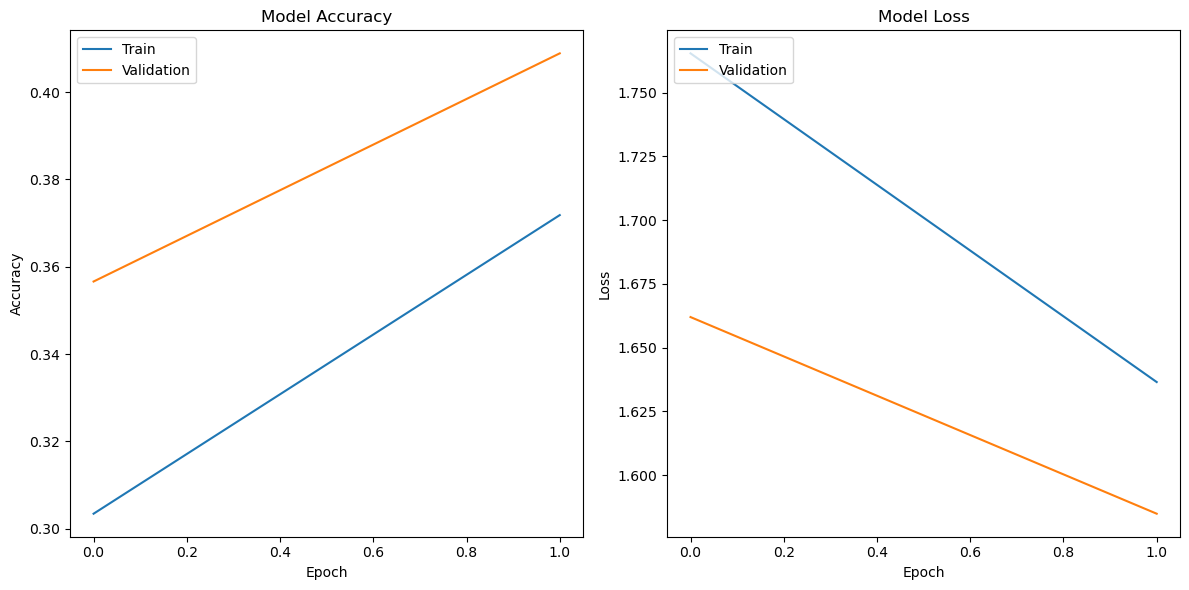

In [40]:
# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [41]:
# Summary of the model 
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [42]:
# Predict classes on validation set and generate a classification report
val_predictions = model.predict(val_generator)
val_predicted_classes = np.argmax(val_predictions, axis=1)
true_classes = val_generator.classes

print("Classification Report:\n")
print(classification_report(true_classes, val_predicted_classes, target_names=list(train_generator.class_indices.keys())))


52/52 [==============================] - 56s 1s/step
Classification Report:

              precision    recall  f1-score   support

   Badminton       0.18      0.08      0.11       289
     Cricket       0.16      0.28      0.20       306
      Karate       0.05      0.03      0.04       104
      Soccer       0.17      0.12      0.14       267
    Swimming       0.11      0.01      0.02       110
      Tennis       0.17      0.22      0.19       275
   Wrestling       0.17      0.22      0.19       295

    accuracy                           0.16      1646
   macro avg       0.14      0.14      0.13      1646
weighted avg       0.16      0.16      0.15      1646



In [43]:

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, val_predicted_classes)
class_labels = list(train_generator.class_indices.keys())  # Replace with your class labels

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)



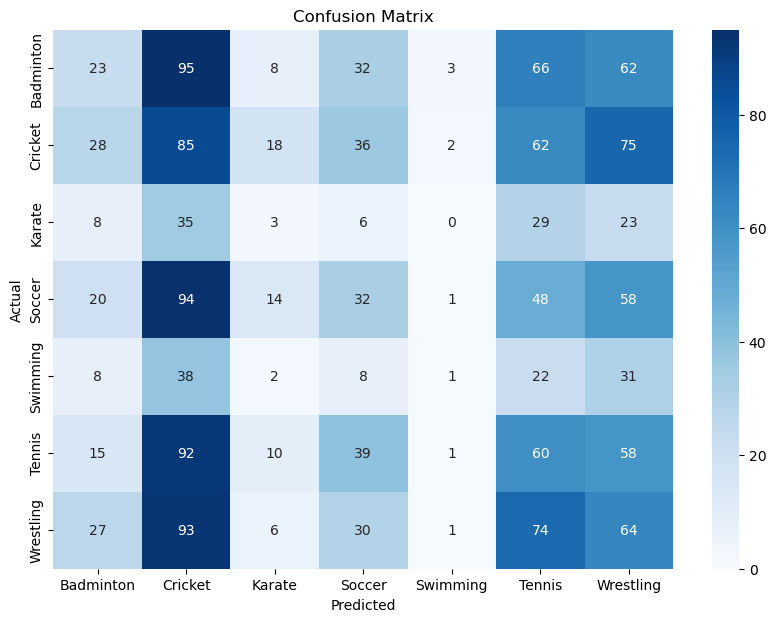

C:\Users\venka\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Optional: Save the model
model.save('resnet50_model.h5')

In [45]:
# Function to predict the class of an image
def predict_image_class(model, img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(64, 64))

    # Convert the image to a numpy array and normalize
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

    # Return the predicted class
    return predicted_class

1/1 [==============================] - 2s 2s/step


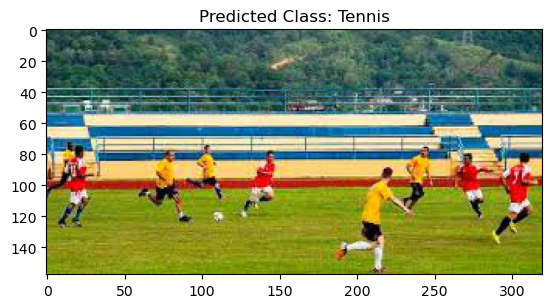

In [46]:
# Replace 'path_to_image' with the path of the image you want to predict
path_to_image =  r'dataset/test\58b8d567a2.jpg'   # User input image path
predicted_class = predict_image_class(model, path_to_image)

# Display the image and prediction
img = Image.open(path_to_image)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

1/1 [==============================] - 0s 85ms/step


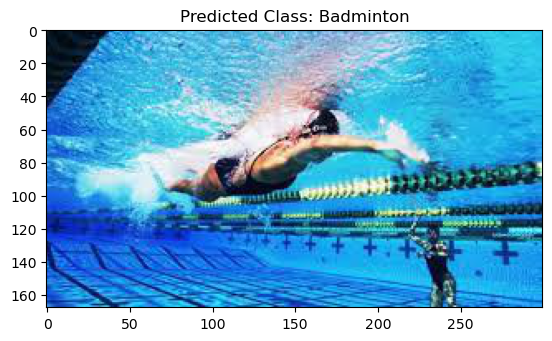

In [47]:
# Replace 'path_to_image' with the path of the image you want to predict
path_to_image =   r'dataset/test\f99dcdcdac.jpg'   # User input image path
predicted_class = predict_image_class(model, path_to_image)

# Display the image and prediction
img = Image.open(path_to_image)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

#  Inception

In [48]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.applications.inception_v3 import InceptionV3
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from PIL import Image


In [49]:
# ImageDataGenerator for augmenting images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='dataset/train/',
    x_col='image_ID',
    y_col='label',
    class_mode='categorical',
    target_size=(299, 299)  # InceptionV3 standard size
)

# Validation generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='dataset/train/',
    x_col='image_ID',
    y_col='label',
    class_mode='categorical',
    target_size=(299, 299)  # InceptionV3 standard size
)

# Number of classes
num_classes = len(train_generator.class_indices)

# Load InceptionV3 model pre-trained on ImageNet data
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top for our specific task
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# Save the model
model.save('inceptionv3_model.h5')
# Train model
history = model.fit(train_generator, epochs=2, validation_data=val_generator)

Found 6581 validated image filenames belonging to 7 classes.
Found 1646 validated image filenames belonging to 7 classes.


C:\Users\venka\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
206/206 [==============================] - 2435s 12s/step - loss: 0.5379 - accuracy: 0.8259 - val_loss: 0.3404 - val_accuracy: 0.8797
Epoch 2/2
206/206 [==============================] - 2386s 12s/step - loss: 0.2496 - accuracy: 0.9151 - val_loss: 0.2559 - val_accuracy: 0.9070


In [50]:
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Inception Accuracy: {final_val_accuracy * 100:.2f}%")


Inception Accuracy: 90.70%


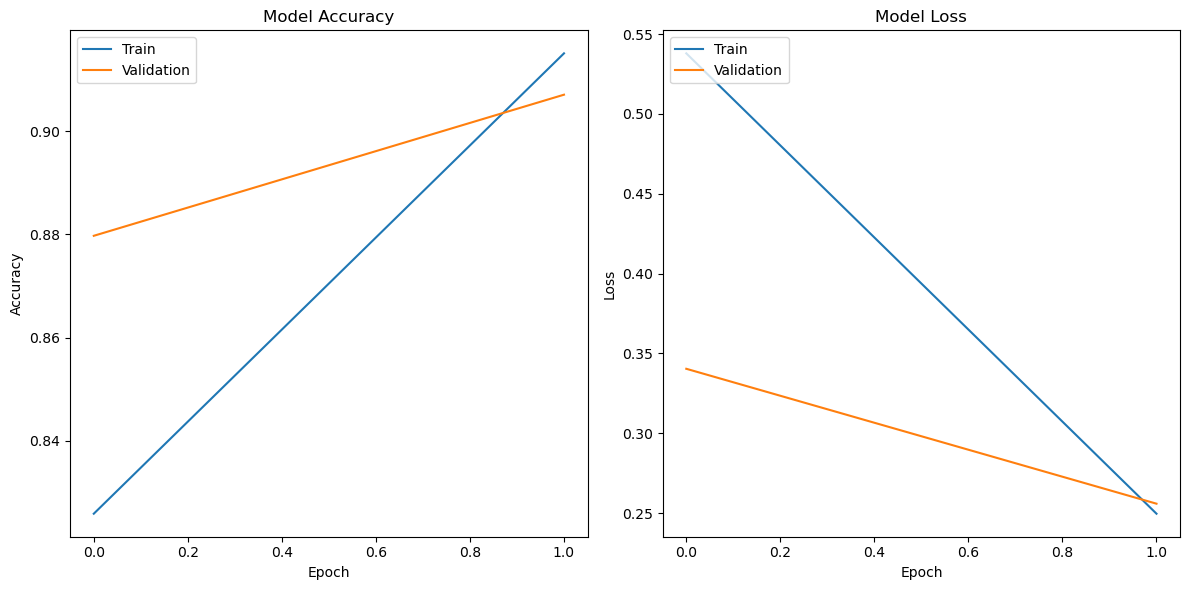

In [51]:
# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [52]:
# Summary of the model 
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d_1[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0]

In [53]:
# Predict classes on validation set and generate a classification report
val_predictions = model.predict(val_generator)
val_predicted_classes = np.argmax(val_predictions, axis=1)
true_classes = val_generator.classes

print("Classification Report:\n")
print(classification_report(true_classes, val_predicted_classes, target_names=list(train_generator.class_indices.keys())))



52/52 [==============================] - 481s 9s/step
Classification Report:

              precision    recall  f1-score   support

   Badminton       0.18      0.19      0.19       289
     Cricket       0.19      0.17      0.18       306
      Karate       0.04      0.04      0.04       104
      Soccer       0.13      0.14      0.14       267
    Swimming       0.07      0.08      0.08       110
      Tennis       0.12      0.13      0.13       275
   Wrestling       0.16      0.15      0.16       295

    accuracy                           0.14      1646
   macro avg       0.13      0.13      0.13      1646
weighted avg       0.15      0.14      0.15      1646



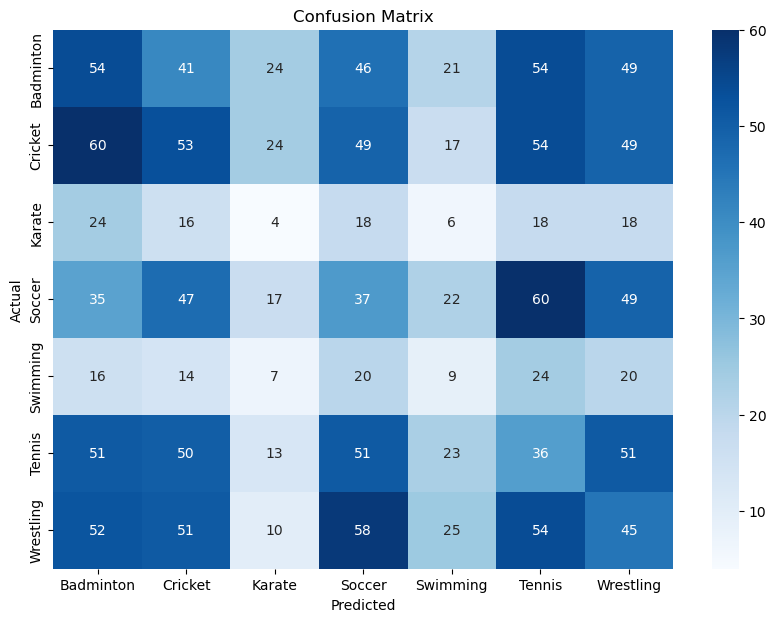

In [54]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, val_predicted_classes)
class_labels = list(train_generator.class_indices.keys())

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [55]:
# Function to predict the class of an image
def predict_image_class(model, img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(299, 299))

    # Convert the image to a numpy array and normalize
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

    # Return the predicted class
    return predicted_class


1/1 [==============================] - 3s 3s/step


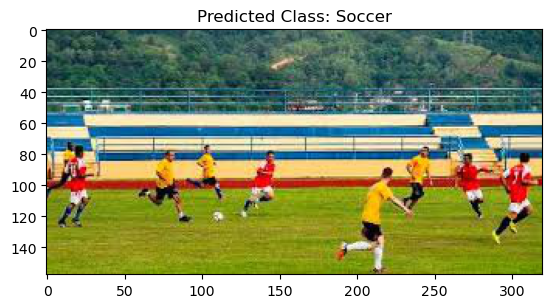

In [56]:
# Replace 'path_to_image' with the path of the image you want to predict
path_to_image =  r'dataset/test\58b8d567a2.jpg'   # User input image path
predicted_class = predict_image_class(model, path_to_image)

# Display the image and prediction
img = Image.open(path_to_image)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

1/1 [==============================] - 0s 467ms/step


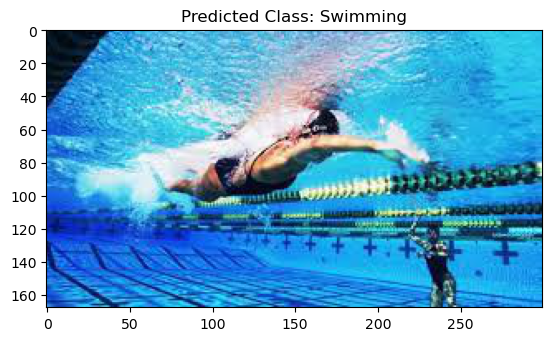

In [57]:
# Replace 'path_to_image' with the path of the image you want to predict
path_to_image =   r'dataset/test\f99dcdcdac.jpg'   # User input image path
predicted_class = predict_image_class(model, path_to_image)

# Display the image and prediction
img = Image.open(path_to_image)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

# Using best model to predict for test data

In [58]:
# Load the saved model
model = tf.keras.models.load_model('inceptionv3_model.h5')

In [59]:
import pandas as pd
from keras.preprocessing import image
import numpy as np

# Load test data
test_df = pd.read_csv('dataset/test.csv')

# Function to preprocess and predict class of an image
def preprocess_and_predict(img_path):
    img = image.load_img(img_path, target_size=(299, 299))  # Update target size
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]
    return predicted_class


In [60]:

# Predict for all images in test.csv
test_df['Predicted_Label'] = test_df['image_ID'].apply(lambda x: preprocess_and_predict('dataset/test/' + x))

# Save predictions to new CSV
test_df.to_csv('dataset/predictions_bestmodel.csv', index=False)


1/1 [==============================] - 0s 188ms/step
